In [1]:
import os
from PIL import Image
import sys
import cv2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torchvision import transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
import torchvision.transforms.functional as F
from torchvision.utils import make_grid
from torchvision.io import read_image
# from pathlib import Path

In [3]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [4]:
dog1_int = read_image('/home/jupyter/faster_RCNN/data/raw_data/low_resolution/NEKOc2013a_000001.JPG')
dog2_int = read_image('/home/jupyter/faster_RCNN/data/raw_data/low_resolution/NEKOc2013a_000002.JPG')
dog_list = [dog1_int, dog2_int]

## FasterRCNN_ResNet50_FPN_Weights.DEFAULT

In [189]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

weights_faster = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights_faster.transforms()

images = [transforms(d) for d in dog_list]

model_1 = fasterrcnn_resnet50_fpn(weights=weights_faster, progress=False)
model_1 = model_1.eval()

bbox_modeled_faster = model_1(images)

## MaskRCNN_ResNet50_FPN_Weights.DEFAULT

In [190]:
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights

weights_mask = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights_mask.transforms()

images = [transforms(d) for d in dog_list]

model = maskrcnn_resnet50_fpn(weights=weights_mask, progress=False)
model = model.eval()

bbox_moleded_mask = model(images)

## Faster versus Mask

In [7]:
labels = bbox_modeled_faster[0]['labels'].detach().numpy()
scores = bbox_modeled_faster[0]['scores'].detach().numpy()
label_names = pd.DataFrame([weights_faster.meta["categories"][label] for label in bbox_modeled_faster[0]['labels']])
# label_names[0].unique()
y = np.arange(0,len(scores),1)

In [8]:
labels_mask = bbox_moleded_mask[0]['labels'].detach().numpy()
scores_mask = bbox_moleded_mask[0]['scores'].detach().numpy()
label_names_mask = pd.DataFrame([weights_mask.meta["categories"][label] for label in bbox_moleded_mask[0]['labels']])
y_mask = np.arange(0,len(scores_mask),1)

<AxesSubplot:>

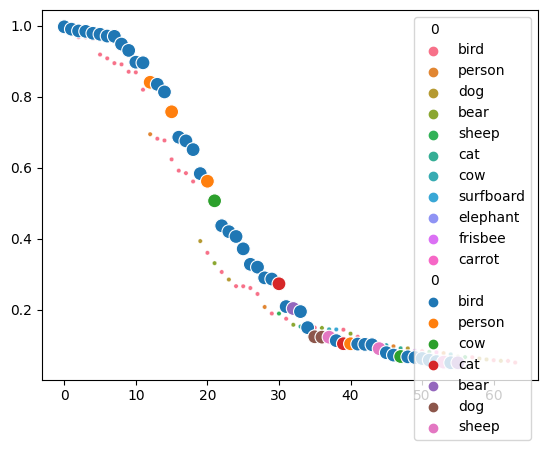

In [9]:
sns.scatterplot(x = y_mask, y = scores_mask, hue=label_names_mask[0], s=10)
sns.scatterplot(x = y , y = scores, hue=label_names[0], s=100)

Creating the inputs

In [74]:
# bbox_modeled_faster
bbox_moleded_[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [84]:
targets = []
for d in bbox_modeled_faster:
    targ = {}
    targ['boxes'] = d['boxes']
    targ['labels'] = d['labels']
    targets.append(targ)

In [85]:
targets[0].keys()

dict_keys(['boxes', 'labels'])

In [140]:
img1_int = read_image('data/raw_data/low_resolution/NEKOc2013a_000001.JPG')
img2_int = read_image('data/raw_data/low_resolution/NEKOc2013a_000002.JPG')
img3_int = read_image('data/raw_data/low_resolution/NEKOc2013b_000003.JPG')
img4_int = read_image('data/raw_data/low_resolution/NEKOc2013b_000002.JPG')

img_list = [img1_int, img2_int, img3_int, img4_int]

images=[]
for i in img_list:
    img = torch.div(i, 255)
    images.append(img)
    
images = images[:2]    
images_test = images[:-2]


## MODELLING

In [191]:
model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

In [194]:
# For training
output = model(images, targets)

In [ ]:
predictions = model(images_test)

In [195]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
bboxes, labels, scores = predictions["boxes"], predictions["labels"], predictions["scores"]
num = torch.argwhere(scores > 0.5).shape[0]


In [199]:
x1,y1, x2, y2 = bboxes[1].detach().numpy().astype(int)
bboxes[1].detach().numpy().astype(int)

array([1768, 1217, 2036, 1386])

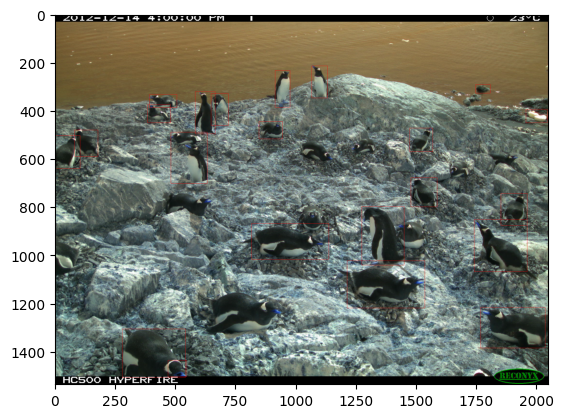

In [200]:
ims = [cv2.imread('data/raw_data/low_resolution/NEKOc2013b_000003.JPG'),
      cv2.imread('data/raw_data/low_resolution/NEKOc2013b_000002.JPG'),
                 cv2.imread('data/raw_data/low_resolution/NEKOc2013b_000001.JPG'),
                            cv2.imread('data/raw_data/low_resolution/NEKOc2013a_000002.JPG'),
                                       cv2.imread('data/raw_data/low_resolution/NEKOc2013a_000001.JPG')]
igg = ims[4]
#img1_int = read_image('data/raw_data/low_resolution/NEKOc2013a_000001.JPG')
#img2_int = read_image('data/raw_data/low_resolution/NEKOc2013a_000002.JPG')
#img3_int = read_image('data/raw_data/low_resolution/NEKOc2013b_000003.JPG')
#img4_int = read_image('data/raw_data/low_resolution/NEKOc2013b_000002.JPG')
for i in range(num):
    x1,y1, x2, y2 = bboxes[i].detach().numpy().astype(int)
    igg = cv2.rectangle(igg, (x1,y1), (x2,y2), (255,0,0), 1)
plt.imshow(igg)
plt.show()

In [ ]:
# optionally, if you want to export the model to ONNX:
torch.onnx.export(model, x, "faster_rcnn.onnx", opset_version = 11)